In [1]:
#importing libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#importing datasets

df_ratings = pd.read_csv("ratings.csv")

df_links = pd.read_csv("links.csv")
df_movies = pd.read_csv("movies.csv")
df_tags = pd.read_csv("tags.csv")


# EDA
# Display of Data Sets (Ratings, Links, Movies, Tags)

In [2]:
#rating data_Set head till 10 rows
df_ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [3]:
#summary of dataset
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [4]:
print("Count or Shape of ratings data set is" + str(df_ratings.shape))
print("Number of unique users are: ", df_ratings['userId'].nunique())
print("Number of movies are: ", df_ratings['movieId'].nunique())
print("Unique Ratings are: ", sorted(df_ratings['rating'].unique()))

Count or Shape of ratings data set is(100836, 4)
Number of unique users are:  610
Number of movies are:  9724
Unique Ratings are:  [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [5]:
##rating link_Set head till 10 rows
df_links.head(10)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
8,9,114576,9091.0
9,10,113189,710.0


In [6]:
print("Shape of Links data set is" + str(df_links.shape))

Shape of Links data set is(9742, 3)


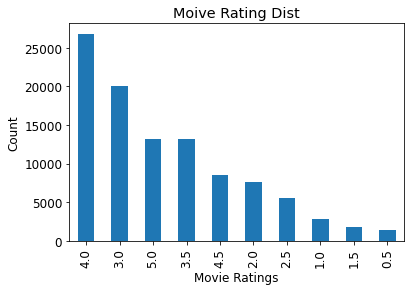

In [7]:
# most rating number given by users
plt.rc('font',size=12)
df_ratings.rating.value_counts(sort=True).plot(kind='bar')
plt.title('Moive Rating Dist')
plt.xlabel('Movie Ratings')
plt.ylabel('Count')
plt.show()

In [8]:
#count number of ratings givne by each user
userID_count=df_ratings['userId'].value_counts()
userID_count.head(15)

414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
249    1046
387    1027
182     977
307     975
603     943
Name: userId, dtype: int64

In [9]:
userID_count.tail(15)

324    21
595    20
189    20
207    20
194    20
147    20
257    20
406    20
431    20
278    20
442    20
569    20
320    20
576    20
53     20
Name: userId, dtype: int64

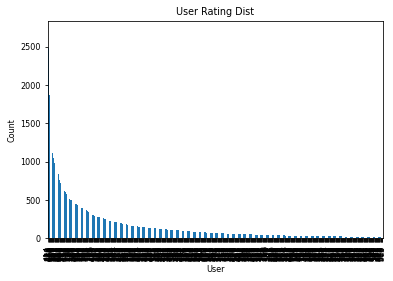

In [10]:
#lets plot the chart of number of ratings given by user
#user given most ratings 
plt.rc('font',size=8)
df_ratings.userId.value_counts(sort=True).plot(kind='bar')
plt.title('User Rating Dist')
plt.xlabel('User')
plt.ylabel('Count')
plt.show()

In [11]:
#movie dataset
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
print("Shape of Movies data set is" + str(df_movies.shape))

Shape of Movies data set is(9742, 3)


In [14]:
print('Unique users are: ', df_ratings['userId'].nunique())
print('Unique No. of Moives are: ', df_ratings['movieId'].nunique())
print('Unique No. of Ratings are: ', df_ratings['rating'].nunique())

Unique users are:  610
Unique No. of Moives are:  9724
Unique No. of Ratings are:  10


In [17]:
#here I merge movies dataset and ratings dataset
df=pd.merge(df_ratings,df_movies, on='movieId', how='inner')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [18]:
#making a table dataframe which has movie name and there mean ratings and total count 

df_avg_ratings=df.groupby('title').agg(ratings_count=('rating','count'),ratings_mean=('rating','mean')).reset_index()

#sort by rating count to find which are the most rated movie
df_avg_ratings.sort_values(by='ratings_count',ascending=False).head()

,title,ratings_count,ratings_mean
3158,Forrest Gump (1994),329,4.164134
7593,"Shawshank Redemption, The (1994)",317,4.429022
6865,Pulp Fiction (1994),307,4.197068
7680,"Silence of the Lambs, The (1991)",279,4.161290
5512,"Matrix, The (1999)",278,4.192446


In [19]:
df_merge = pd.merge(df,df_avg_ratings[['title']], on='title', how='inner')
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [20]:
#creating user base matrix
user_matrix=df.pivot_table(index='userId',columns='title', values='rating')
user_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Taking Person correlation

In [23]:
#taking pearson similarity correlation
user_sim=user_matrix.T.corr('pearson')
user_sim.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,0.091574,-2.071128e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.0,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-0.387347,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
4,0.207983,NaN,NaN,1.000000,-0.336525,0.148498,0.542861,0.117851,NaN,0.485794,...,-0.222113,3.966413e-01,0.090090,-0.080296,0.400124,0.144603,0.116518,-0.170501,-0.277350,-0.043786
5,0.268749,NaN,NaN,-0.336525,1.000000,0.043166,0.158114,0.028347,NaN,-0.777714,...,0.000000,1.533034e-01,0.234743,0.067791,-0.364156,0.244321,0.231080,-0.020546,0.384111,0.040582


In [24]:
#Making a sub-group of 4 similar users of USERId:1
user_sim1=user_sim[user_sim.index==1]
user_sim1.head(20)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.0,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,0.091574,-2.071128e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.26807,-0.175412,-0.032086


In [25]:
user=1
#drop this user from the user_sim
sim1=user_sim.copy()
sim1.drop(index=user, inplace = True)


In [26]:
#check 4 similar users as compared to target user 1

u=8          #find 4 similar_user randonly
user_thrsh = 0.01
#user which has similarity more than 0.05 only
simuser1=sim1[sim1[user]>user_thrsh][user].sort_values(ascending=False)[:u]


print("similar user for "+ str(user) + " are "+ str(simuser1.head(8)))

similar user for 1 are userId
550    1.000000
146    1.000000
106    1.000000
333    1.000000
598    1.000000
473    0.962250
511    0.925820
9      0.918559
Name: 1, dtype: float64


# Target_userId: 1 similar users are having userID: 550, 473, 106, 511       

In [27]:
#now to find which are the top most similar users for the target userId: 1, we calculate KenDall Distances

In [28]:
#movies watched by selected user 1
user_watched1=user_matrix[user_matrix.index==user].dropna(axis=1,how='all')
user_watched1

title,"13th Warrior, The (1999)",20 Dates (1998),"Abyss, The (1989)","Adventures of Robin Hood, The (1938)",Alice in Wonderland (1951),Alien (1979),All Quiet on the Western Front (1930),American Beauty (1999),American History X (1998),"American Tail, An (1986)",...,Wild Things (1998),Willow (1988),Willy Wonka & the Chocolate Factory (1971),Winnie the Pooh and the Blustery Day (1968),"Wizard of Oz, The (1939)","Wolf Man, The (1941)",X-Men (2000),Young Frankenstein (1974),Young Sherlock Holmes (1985),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,...,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0


In [29]:
#print common movies watched by 10 similar users of target user
movies_similar_user11=user_matrix[user_matrix.index.isin(simuser1.index)].dropna(axis=1, how='all')
movies_similar_user11.head(10)

title,101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),12 Years a Slave (2013),13 Going on 30 (2004),1408 (2007),"2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",2001: A Space Odyssey (1968),21 (2008),21 Grams (2003),...,Up (2009),Up at the Villa (2000),Vanilla Sky (2001),WALL·E (2008),Waking Life (2001),What Dreams May Come (1998),What's Eating Gilbert Grape (1993),Witness (1985),"Wolf of Wall Street, The (2013)",xXx (2002)
userId,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,3.0,4.0,2.5,NaN,3.0,NaN,1.5,NaN,3.5,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,4.0,3.0,NaN,NaN,NaN,NaN
511,NaN,NaN,NaN,4.0,NaN,3.5,NaN,NaN,NaN,NaN,...,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
score_list11={}

#print top 20 recommended movies based on movie_score
#movie_score is multiplication of user_similarity and movie_rating
for i in movies_similar_user11.columns:
    movie_rating=movies_similar_user11[i]
    tsc=0
    count=0
    for u in simuser1.index:
        if pd.isna(movie_rating[u])==False:
            score=simuser1[u]*movie_rating[u]
            tsc=tsc+score
            count=count+1
    score_list11[i]=tsc/count

score_list11=pd.DataFrame(score_list11.items(), columns=['movie', 'movie_score'])
score_list11=score_list11.sort_values(by='movie_score', ascending=False)
mov=20
print("Top "+str(mov)+" recommended movies based on User "+ str(user))

score_list11.head(mov)

Top 20 recommended movies based on User 1


,movie,movie_score
60,Deadpool (2016),5.0
185,Pirates of the Caribbean: The Curse of the Bla...,5.0
41,Bossa Nova (2000),5.0
191,"Pursuit of Happyness, The (2006)",5.0
209,Sherlock Holmes (2009),5.0
28,Avatar (2009),5.0
143,"Lifeguard, The (2013)",5.0
95,Harry Potter and the Chamber of Secrets (2002),5.0
116,Insurgent (2015),5.0
96,Harry Potter and the Deathly Hallows: Part 1 (...,5.0


In [31]:
#movies watched by similar_user with userId: 550

In [32]:
#Selecting first target user [ 550 ] for generating 10 simlilar users later on and 20 moveis
user=550

#drop this user from the user_sim
sim11=user_sim.copy()
sim11.drop(index=user, inplace = True)


In [33]:
#check top 10 similar users as compared to target user 550 and find common movies watched by them
u=10         #find 10 similar_user randonly
user_thrsh = 0.01
#user which has similarity more than 0.05 only
simuser11=sim11[sim11[user]>user_thrsh][user].sort_values(ascending=False)[:u]


print("similar user for "+ str(user) + " are "+ str(simuser11.head(10)))

similar user for 550 are userId
607    1.0
1      1.0
430    1.0
121    1.0
335    1.0
372    1.0
385    1.0
69     1.0
72     1.0
38     1.0
Name: 550, dtype: float64


In [34]:
#movies watched by selected user 550
user_watched11=user_matrix[user_matrix.index==user].dropna(axis=1,how='all')
user_watched11

title,21 Jump Street (2012),"Avengers, The (2012)",Avengers: Age of Ultron (2015),Captain America: The First Avenger (2011),Catch Me If You Can (2002),"Dark Knight, The (2008)",Deadpool (2016),Easy A (2010),Ex Machina (2015),Forrest Gump (1994),...,Mad Max: Fury Road (2015),"Matrix, The (1999)","Shawshank Redemption, The (1994)",The Imitation Game (2014),The Martian (2015),Thor (2011),Toy Story (1995),Up (2009),WALL·E (2008),"Wolf of Wall Street, The (2013)"
userId,,,,,,,,,,,,,,,,,,,,,
550,4.0,5.0,4.0,3.5,4.0,4.0,5.0,4.0,4.5,4.0,...,4.0,4.5,4.5,4.5,4.0,4.0,4.0,4.5,4.0,4.0


In [35]:
#print common movies watched by similar users of target user
movies_similar_user101=user_matrix[user_matrix.index.isin(simuser11.index)].dropna(axis=1, how='all')
movies_similar_user101.head(10)

title,12 Angry Men (1957),"13th Warrior, The (1999)",2 Days in the Valley (1996),20 Dates (1998),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),28 Days (2000),A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),...,Wolf (1994),"Wolf Man, The (1941)",Wyatt Earp (1994),X-Men (2000),X2: X-Men United (2003),You've Got Mail (1998),Young Frankenstein (1974),Young Guns (1988),Young Sherlock Holmes (1985),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,5.0,NaN,5.0,NaN,NaN,5.0,NaN,3.0,4.0
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,NaN,NaN,NaN,NaN,NaN,5.0,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
372,4.0,NaN,NaN,NaN,3.0,2.0,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN
385,NaN,NaN,3.0,NaN,3.0,4.0,NaN,NaN,3.0,3.0,...,NaN,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN
430,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,NaN,...,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN


In [36]:
score_list101={}

#print top 20 recommended movies based on movie_score
#movie_score is multiplication of user_similarity and movie_rating
for i in movies_similar_user101.columns:
    movie_rating=movies_similar_user101[i]
    tsc=0
    count=0
    for u in simuser11.index:
        if pd.isna(movie_rating[u])==False:
            score=simuser11[u]*movie_rating[u]
            tsc=tsc+score
            count=count+1
    score_list101[i]=tsc/count

score_list101=pd.DataFrame(score_list101.items(), columns=['movie', 'movie_score'])
score_list101=score_list101.sort_values(by='movie_score', ascending=False)
mov=20
print("Top "+str(mov)+" recommended movies for UserId "+ str(user))

score_list101.head(mov)

Top 20 recommended movies for UserId 550


,movie,movie_score
402,Miracle on 34th Street (1947),5.0
661,"Untouchables, The (1987)",5.0
455,"Perfect Storm, The (2000)",5.0
289,Halloween: The Curse of Michael Myers (Hallowe...,5.0
244,Friday the 13th (1980),5.0
38,Animal House (1978),5.0
676,Wes Craven's New Nightmare (Nightmare on Elm S...,5.0
229,First Blood (Rambo: First Blood) (1982),5.0
157,Daylight (1996),5.0
431,Never Cry Wolf (1983),5.0


In [37]:
#now taking second similar user of Target UserID:1
#movies watched by similar_user with userId: 146

In [38]:
#Selecting second similar user [ 473 ] for generating 10 simlilar users later on and 20 moveis
user=473    

#drop this user from the user_sim
sim12=user_sim.copy()
sim12.drop(index=user, inplace = True)


In [39]:
#check top 10 similar users as compared to useriD 473 and find common movies watched by them
u=10         #find 10 similar_user randonly for userId: 473    
user_thrsh = 0.01
#user which has similarity more than 0.05 only
simuser12=sim12[sim12[user]>user_thrsh][user].sort_values(ascending=False)[:u]


print("similar user for "+ str(user) + " are "+ str(simuser12.head(10)))

similar user for 473 are userId
195    1.0
271    1.0
373    1.0
342    1.0
102    1.0
207    1.0
540    1.0
541    1.0
209    1.0
83     1.0
Name: 473, dtype: float64


In [40]:
#movies watched by selected userId:473    
user_watched12=user_matrix[user_matrix.index==user].dropna(axis=1,how='all')
user_watched12

title,Almost Famous (2000),American History X (1998),Big Fish (2003),Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan (2006),"Break-Up, The (2006)",Buffy the Vampire Slayer (1992),Can't Hardly Wait (1998),Derailed (2005),Donnie Darko (2001),Eternal Sunshine of the Spotless Mind (2004),...,Saw (2004),"Scanner Darkly, A (2006)","Science of Sleep, The (La science des rêves) (2006)","Shawshank Redemption, The (1994)",She's All That (1999),Spice World (1997),Toys (1992),Vanilla Sky (2001),Waking Life (2001),What Dreams May Come (1998)
userId,,,,,,,,,,,,,,,,,,,,,
473,5.0,4.5,4.0,3.5,3.5,2.0,2.0,3.5,4.0,5.0,...,4.0,4.0,4.0,5.0,2.5,0.5,2.5,4.0,4.0,3.0


In [41]:
#print common movies watched by similar users of userId: 473    
movies_similar_user102=user_matrix[user_matrix.index.isin(simuser12.index)].dropna(axis=1, how='all')
movies_similar_user102.head(10)

title,10 (1979),127 Hours (2010),"13th Warrior, The (1999)",16 Blocks (2006),2001: A Space Odyssey (1968),24 Hour Party People (2002),28 Days Later (2002),300 (2007),54 (1998),8 Mile (2002),...,Wild Wild West (1999),Willow (1988),Willy Wonka & the Chocolate Factory (1971),Witness (1985),"Wizard of Oz, The (1939)","World According to Garp, The (1982)","X-Files: Fight the Future, The (1998)",X-Men (2000),You Can Count on Me (2000),Zombieland (2009)
userId,,,,,,,,,,,,,,,,,,,,,
83,NaN,NaN,NaN,NaN,5.0,NaN,3.5,1.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,4.0,3.0,4.0,4.0,NaN
207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
271,2.0,NaN,2.0,2.5,4.0,4.0,2.5,NaN,NaN,3.0,...,NaN,NaN,NaN,3.0,NaN,NaN,2.5,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
score_list102={}

#print top 20 recommended movies based on movie_score
#movie_score is multiplication of user_similarity and movie_rating
for i in movies_similar_user102.columns:
    movie_rating=movies_similar_user102[i]
    tsc=0
    count=0
    for u in simuser12.index:
        if pd.isna(movie_rating[u])==False:
            score=simuser12[u]*movie_rating[u]
            tsc=tsc+score
            count=count+1
    score_list102[i]=tsc/count

score_list102=pd.DataFrame(score_list102.items(), columns=['movie', 'movie_score'])
score_list102=score_list102.sort_values(by='movie_score', ascending=False)
mov=20
print("Top "+str(mov)+" recommended movies for UserId "+ str(user))

score_list102.head(mov)

Top 20 recommended movies for UserId 473


,movie,movie_score
197,Field of Dreams (1989),5.0
402,Rear Window (1954),5.0
102,Bridget Jones's Diary (2001),5.0
515,Unforgiven (1992),5.0
484,Swingers (1996),5.0
114,Christmas Vacation (National Lampoon's Christm...,5.0
505,Traffic (2000),5.0
448,"Slums of Beverly Hills, The (1998)",5.0
229,Goodfellas (1990),5.0
195,Ferris Bueller's Day Off (1986),5.0


In [43]:
#now taking Third similar user of Target UserID:1
#movies watched by similar_user with userId: 106

In [44]:
#Selecting second similar user [ 106 ] for generating 10 simlilar users later on and 20 moveis
user=106

#drop this user from the user_sim
sim13=user_sim.copy()
sim13.drop(index=user, inplace = True)


In [45]:
#check top 10 similar users as compared to useriD 106 and find common movies watched by them
u=10         #find 10 similar_user randonly for userId: 106
user_thrsh = 0.01
#user which has similarity more than 0.01 only
simuser13=sim13[sim13[user]>user_thrsh][user].sort_values(ascending=False)[:u]


print("similar user for "+ str(user) + " are "+ str(simuser13.head(10)))

similar user for 106 are userId
9      1.0
325    1.0
25     1.0
1      1.0
57     1.0
535    1.0
161    1.0
527    1.0
511    1.0
594    1.0
Name: 106, dtype: float64


In [46]:
#movies watched by selected userId:106
user_watched13=user_matrix[user_matrix.index==user].dropna(axis=1,how='all')
user_watched13

title,Avatar (2009),"Chronicles of Narnia: Prince Caspian, The (2008)","Chronicles of Narnia: The Lion, the Witch and the Wardrobe, The (2005)",Clash of the Titans (2010),Constantine (2005),English Vinglish (2012),Guardians of the Galaxy (2014),Harry Potter and the Deathly Hallows: Part 1 (2010),Harry Potter and the Deathly Hallows: Part 2 (2011),Harry Potter and the Goblet of Fire (2005),...,Pirates of the Caribbean: At World's End (2007),Pirates of the Caribbean: Dead Man's Chest (2006),Pirates of the Caribbean: On Stranger Tides (2011),Pirates of the Caribbean: The Curse of the Black Pearl (2003),"Pursuit of Happyness, The (2006)","Shawshank Redemption, The (1994)",Sherlock Holmes (2009),Source Code (2011),Spider-Man (2002),Thor (2011)
userId,,,,,,,,,,,,,,,,,,,,,
106,5.0,3.5,3.5,3.0,2.5,5.0,3.5,5.0,5.0,5.0,...,5.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,3.5,4.0


In [47]:
#print common movies watched by similar users of userId: 106
movies_similar_user103=user_matrix[user_matrix.index.isin(simuser13.index)].dropna(axis=1, how='all')
movies_similar_user103.head(10)

title,10 Things I Hate About You (1999),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Years a Slave (2013),"13th Warrior, The (1999)",1408 (2007),1984 (Nineteen Eighty-Four) (1984),2 Days in the Valley (1996),20 Dates (1998),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),...,Yojimbo (1961),You've Got Mail (1998),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),Young Sherlock Holmes (1985),Zero Effect (1998),xXx (2002),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,3.0,NaN,NaN,4.0,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,5.0,...,5.0,NaN,4.0,3.0,2.0,NaN,NaN,NaN,2.0,NaN
161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,3.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
511,NaN,NaN,4.0,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
score_list103={}

#print top 20 recommended movies based on movie_score
#movie_score is multiplication of user_similarity and movie_rating
for i in movies_similar_user103.columns:
    movie_rating=movies_similar_user103[i]
    tsc=0
    count=0
    for u in simuser13.index:
        if pd.isna(movie_rating[u])==False:
            score=simuser13[u]*movie_rating[u]
            tsc=tsc+score
            count=count+1
    score_list103[i]=tsc/count

score_list103=pd.DataFrame(score_list103.items(), columns=['movie', 'movie_score'])
score_list103=score_list103.sort_values(by='movie_score', ascending=False)
mov=20
print("Top "+str(mov)+" recommended movies for UserId "+ str(user))

score_list103.head(mov)

Top 20 recommended movies for UserId 106


,movie,movie_score
444,Harvey (1950),5.0
245,Deadpool 2 (2018),5.0
787,Raging Bull (1980),5.0
890,Sling Blade (1996),5.0
947,Strangers on a Train (1951),5.0
502,Inglourious Basterds (2009),5.0
966,Swept Away (Travolti da un insolito destino ne...,5.0
70,Avengers: Infinity War - Part I (2018),5.0
232,"Dark Knight, The (2008)",5.0
65,Austin Powers in Goldmember (2002),5.0


In [49]:
#now taking Third similar user of Target UserID:1
#movies watched by similar_user with userId: 511          

In [50]:
#Selecting second similar user [ 511 ] for generating 10 simlilar users later on and 20 moveis
user=511    

#drop this user from the user_sim
sim14=user_sim.copy()
sim14.drop(index=user, inplace = True)

In [51]:
#check top 10 similar users as compared to useriD 511     and find common movies watched by them
u=10         #find 10 similar_user randonly for userId: 511          
user_thrsh = 0.01
#user which has similarity more than 0.01 only
simuser14=sim14[sim14[user]>user_thrsh][user].sort_values(ascending=False)[:u]


print("similar user for "+ str(user) + " are "+ str(simuser14.head(10)))

similar user for 511 are userId
407    1.0
117    1.0
437    1.0
373    1.0
369    1.0
58     1.0
78     1.0
430    1.0
335    1.0
385    1.0
Name: 511, dtype: float64


In [52]:
#movies watched by selected userId:511          
user_watched14=user_matrix[user_matrix.index==user].dropna(axis=1,how='all')
user_watched14

title,12 Years a Slave (2013),1408 (2007),Abraham Lincoln: Vampire Hunter (2012),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",Arrival (2016),"Avengers, The (2012)",Bridge to Terabithia (2007),City Lights (1931),Cloud Atlas (2012),"Dark Knight Rises, The (2012)",...,"Shawshank Redemption, The (1994)",Snowpiercer (2013),Spider-Man (2002),Star Wars: Episode I - The Phantom Menace (1999),Sweeney Todd: The Demon Barber of Fleet Street (2007),The Hunger Games (2012),The Martian (2015),The Revenant (2015),Thor: Ragnarok (2017),Up (2009)
userId,,,,,,,,,,,,,,,,,,,,,
511,4.0,3.5,3.5,4.0,4.0,4.5,3.0,4.5,4.0,5.0,...,5.0,3.5,3.5,4.0,3.5,3.5,4.0,5.0,4.0,4.5


In [53]:
#print common movies watched by similar users of userId: 511    
movies_similar_user104=user_matrix[user_matrix.index.isin(simuser14.index)].dropna(axis=1, how='all')
movies_similar_user104.head(10)

title,2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),28 Days (2000),A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Adaptation (2002),Addams Family Values (1993),...,Willy Wonka & the Chocolate Factory (1971),"Wings of Desire (Himmel über Berlin, Der) (1987)",Winnie the Pooh and the Blustery Day (1968),With Honors (1994),Wyatt Earp (1994),X-Men (2000),X2: X-Men United (2003),Yellow Submarine (1968),You've Got Mail (1998),Young Frankenstein (1974)
userId,,,,,,,,,,,,,,,,,,,,,
58,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,3.0,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
373,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,3.0,3.0,4.0,NaN,NaN,3.0,3.0,NaN,NaN,4.0,...,4.0,5.0,4.0,NaN,2.0,NaN,NaN,NaN,NaN,3.0
407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
430,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN


In [56]:
score_list104={}

#print top 20 recommended movies based on movie_score
#movie_score is multiplication of user_similarity and movie_rating
for i in movies_similar_user104.columns:
    movie_rating=movies_similar_user104[i]
    tsc=0
    count=0
    for u in simuser14.index:
        if pd.isna(movie_rating[u])==False:
            score=simuser14[u]*movie_rating[u]
            tsc=tsc+score
            count=count+1
    score_list104[i]=tsc/count

score_list104=pd.DataFrame(score_list104.items(), columns=['movie', 'movie_score'])
score_list104=score_list104.sort_values(by='movie_score', ascending=False)
mov=20
print("Top "+str(mov)+" recommended movies for UserId "+ str(user))

score_list104.head(mov)

Top 20 recommended movies for UserId 511


,movie,movie_score
302,"Lord of the Rings: The Two Towers, The (2002)",5.0
301,"Lord of the Rings: The Return of the King, The...",5.0
300,"Lord of the Rings: The Fellowship of the Ring,...",5.0
218,Gone Girl (2014),5.0
132,"Dark Knight, The (2008)",5.0
328,Minority Report (2002),5.0
283,Lawrence of Arabia (1962),5.0
105,Citizen Kane (1941),5.0
344,Muriel's Wedding (1994),5.0
150,Dr. Strangelove or: How I Learned to Stop Worr...,5.0


In [57]:
import scipy.stats as stats
#KendallTau Distance between target UserId: 1 and its first similar user with UserId:550
tau101, p_value = stats.kendalltau(score_list11['movie_score'].head(30), score_list101['movie_score'].head(30))
tau101

0.34438437109556624

In [58]:
#KendallTau Distance between target UserId: 1 and its first similar user with UserId: 473    
tau102, p_value = stats.kendalltau(score_list11['movie_score'].head(30), score_list102['movie_score'].head(30))
tau102

0.2560762556992418

In [59]:
#KendallTau Distance between target UserId: 1 and its first similar user with UserId: 106
tau103, p_value = stats.kendalltau(score_list11['movie_score'].head(30), score_list103['movie_score'].head(30))
tau103

0.5132944359184718

In [60]:
#KendallTau Distance between target UserId: 1 and its first similar user with UserId: 9      
tau104, p_value = stats.kendalltau(score_list11['movie_score'].head(30), score_list104['movie_score'].head(30))
tau104

0.32009531962405224

In [ ]:
#making a list of KendalTau distances

In [239]:
tau_g=[tau101,tau102,tau103,tau104]

In [240]:
tau_g=[abs(ele) for ele in tau_g]
tau_g

[0.34438437109556624,
 0.2560762556992418,
 0.5132944359184718,
 0.32009531962405224]

In [241]:
#as we can see that the 3 minimum KenDall Distances are tau102: 0.256, tau104:0.32, tau101: 0.344

In [61]:
#Hence for group recommendation we should make group of UseriD 146, UserId: 333, userId: 550,
#Hence these 3 users are more similar to target UserID:1 from a group of 4.
#we can take a bigger group as well and calculate KEndall distqnces to find the best similar users whcih can help to generate
#recommendation for target user.
#have a better movie recommendation for target userID:1 
#the movie recommendatiion for the group will also be recommendation for the TargetUserID: 1

# Selecting 3 users - UserID: 4,5,6 and making there group

In [62]:
#Selecting first target user [ 4 ] for generating 10 simlilar users later on and 20 moveis
user=4
#drop this user from the user_sim
rem_sim1=user_sim.copy()

rem_sim1.drop(index=user, inplace = True)


In [63]:
rem_sim1.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,0.091574,-2.071128e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.0,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-0.387347,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
5,0.268749,NaN,NaN,-0.336525,1.000000,0.043166,0.158114,0.028347,NaN,-0.777714,...,0.000000,1.533034e-01,0.234743,0.067791,-0.364156,0.244321,0.231080,-0.020546,0.384111,0.040582
6,-0.291636,NaN,NaN,0.148498,0.043166,1.000000,-0.126595,-0.200062,NaN,0.957427,...,-0.292770,-2.749519e-02,-0.112141,-0.090297,0.100735,-0.049192,0.255639,0.125428,0.193649,0.115580


In [64]:
#check top 10 similar users as compared to target user 4
#choosing 20 similar users of the target user
u=20
user_thrsh = 0.05
#user which has similarity more than 0.05 only
sim_users1=rem_sim1[rem_sim1[user]>user_thrsh][user].sort_values(ascending=False)[:u]

print("similar user for "+ str(user) + " are "+ str(sim_users1.head(20)))


similar user for 4 are userId
299    1.000000
360    1.000000
518    1.000000
544    1.000000
396    1.000000
378    0.986440
44     0.982708
502    0.927173
539    0.891042
521    0.887412
397    0.878310
43     0.874007
481    0.866025
162    0.866025
151    0.866025
340    0.816497
475    0.814345
46     0.771744
75     0.745872
498    0.707107
Name: 4, dtype: float64


In [65]:
#movies watched by selected user 4
user_watched=user_matrix[user_matrix.index==user].dropna(axis=1,how='all')
user_watched

title,12 Angry Men (1957),"Adventures of Priscilla, Queen of the Desert, The (1994)",Afterglow (1997),Airplane! (1980),Aladdin (1992),All About My Mother (Todo sobre mi madre) (1999),Almost Famous (2000),Amadeus (1984),American Beauty (1999),Austin Powers: International Man of Mystery (1997),...,Waiting for Guffman (1996),Waking Ned Devine (a.k.a. Waking Ned) (1998),West Side Story (1961),What About Bob? (1991),"Wild Bunch, The (1969)",Willy Wonka & the Chocolate Factory (1971),"Wings of Desire (Himmel über Berlin, Der) (1987)",With Honors (1994),"Wizard of Oz, The (1939)",Wonder Boys (2000)
userId,,,,,,,,,,,,,,,,,,,,,
4,5.0,4.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,...,5.0,4.0,5.0,3.0,2.0,4.0,1.0,2.0,5.0,4.0


In [66]:
#print common movies watched by 10 similar users of target user
movies_similar_user1=user_matrix[user_matrix.index.isin(sim_users1.index)].dropna(axis=1, how='all')
movies_similar_user1.head(10)

title,1-900 (06) (1994),101 Dalmatians (1996),2001: A Space Odyssey (1968),50/50 (2011),A.I. Artificial Intelligence (2001),Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Addams Family Values (1993),"Adventures of Pinocchio, The (1996)",Air Force One (1997),...,Witness for the Prosecution (1957),Wolf (1994),"Wolf of Wall Street, The (2013)",X-Men (2000),X-Men: Days of Future Past (2014),X-Men: First Class (2011),X-Men: The Last Stand (2006),X2: X-Men United (2003),Zombieland (2009),Zootopia (2016)
userId,,,,,,,,,,,,,,,,,,,,,
43,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,5.0,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
score_list1={}

#print top 20 recommended movies based on movie_score
#movie_score is multiplication of user_similarity and movie_rating
for i in movies_similar_user1.columns:
    movie_rating=movies_similar_user1[i]
    tsc=0
    count=0
    for u in sim_users1.index:
        if pd.isna(movie_rating[u])==False:
            score=sim_users1[u]*movie_rating[u]
            tsc=tsc+score
            count=count+1
    score_list1[i]=tsc/count

score_list1=pd.DataFrame(score_list1.items(), columns=['movie', 'movie_score'])
score_list1=score_list1.sort_values(by='movie_score', ascending=False)
mov=20
print("Top "+str(mov)+" movies based on User "+ str(user))

score_list1.head(mov)

Top 20 movies based on User 4


,movie,movie_score
116,"Cry, the Beloved Country (1995)",5.000000
583,William Shakespeare's Romeo + Juliet (1996),5.000000
148,Ed (1996),5.000000
350,Moll Flanders (1996),5.000000
532,"Thin Line Between Love and Hate, A (1996)",5.000000
520,That Thing You Do! (1996),5.000000
385,"Peacemaker, The (1997)",5.000000
188,French Twist (Gazon maudit) (1995),5.000000
26,Anne Frank Remembered (1995),5.000000
399,"Player, The (1992)",5.000000


In [68]:
score_list1.shape

(597, 2)

# 2nd Target User

In [69]:
#Selecting Second target user [ 5 ] for generating 10 simlilar users later on and 20 moveis
user=5
#drop this user from the user_sim
rem_sim2=user_sim.copy()

rem_sim2.drop(index=user, inplace = True)

In [70]:
rem_sim2.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,0.091574,-2.071128e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.0,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-0.387347,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
4,0.207983,NaN,NaN,1.000000,-0.336525,0.148498,0.542861,0.117851,NaN,0.485794,...,-0.222113,3.966413e-01,0.090090,-0.080296,0.400124,0.144603,0.116518,-0.170501,-0.277350,-0.043786
6,-0.291636,NaN,NaN,0.148498,0.043166,1.000000,-0.126595,-0.200062,NaN,0.957427,...,-0.292770,-2.749519e-02,-0.112141,-0.090297,0.100735,-0.049192,0.255639,0.125428,0.193649,0.115580


In [71]:
#check top 10 similar users as compared to second target user 5
#choosing 20 similar users of the second target user
u=20
user_thrsh = 0.05
#user which has similarity more than 0.05 only
sim_users2=rem_sim2[rem_sim2[user]>user_thrsh][user].sort_values(ascending=False)[:u]

print("similar user for "+ str(user) + " are "+ str(sim_users2.head(20)))

similar user for 5 are userId
408    1.000000
85     1.000000
189    1.000000
405    1.000000
478    1.000000
190    1.000000
31     1.000000
285    1.000000
350    1.000000
228    1.000000
300    1.000000
540    1.000000
73     1.000000
552    1.000000
12     1.000000
341    1.000000
225    1.000000
351    1.000000
553    0.981981
393    0.977356
Name: 5, dtype: float64


In [72]:
#movies watched by selected second user 5
user_watched=user_matrix[user_matrix.index==user].dropna(axis=1,how='all')
user_watched

title,Ace Ventura: Pet Detective (1994),Addams Family Values (1993),Aladdin (1992),Apollo 13 (1995),Babe (1995),Batman (1989),Batman Forever (1995),Beauty and the Beast (1991),Braveheart (1995),Clear and Present Danger (1994),...,Schindler's List (1993),"Secret Garden, The (1993)",Shadowlands (1993),"Shawshank Redemption, The (1994)",Snow White and the Seven Dwarfs (1937),Stargate (1994),Terminator 2: Judgment Day (1991),Toy Story (1995),True Lies (1994),"Usual Suspects, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
5,3.0,3.0,4.0,3.0,4.0,3.0,3.0,5.0,4.0,3.0,...,5.0,4.0,3.0,3.0,5.0,2.0,3.0,4.0,2.0,4.0


In [73]:
#print common movies watched by 10 similar users of target user
movies_similar_user2=user_matrix[user_matrix.index.isin(sim_users2.index)].dropna(axis=1, how='all')
movies_similar_user2.head(10)

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),12 Angry Men (1957),127 Hours (2010),"13th Warrior, The (1999)",17 Again (2009),2001: A Space Odyssey (1968),2012 (2009),...,Yes Man (2008),You Don't Mess with the Zohan (2008),Young Frankenstein (1974),Zack and Miri Make a Porno (2008),Zathura (2005),Zodiac (2007),Zombieland (2009),Zookeeper (2011),Zoolander (2001),Zootopia (2016)
userId,,,,,,,,,,,,,,,,,,,,,
12,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,NaN,4.0,NaN,NaN,NaN,4.0,NaN,3.5,4.0,2.0,...,4.0,NaN,NaN,4.0,NaN,4.5,5.0,NaN,NaN,5.0
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
score_list2={}

#print top 20 recommended movies based on movie_score
#movie_score is multiplication of user_similarity and movie_rating
for i in movies_similar_user2.columns:
    movie_rating=movies_similar_user2[i]
    tsc=0
    count=0
    for u in sim_users2.index:
        if pd.isna(movie_rating[u])==False:
            score=sim_users2[u]*movie_rating[u]
            tsc=tsc+score
            count=count+1
    score_list2[i]=tsc/count

score_list2=pd.DataFrame(score_list2.items(), columns=['movie', 'movie_score'])
score_list2=score_list2.sort_values(by='movie_score', ascending=False)
mov=20
print("Top "+str(mov)+" movies based on second target User "+ str(user))
score_list2.head(mov)

Top 20 movies based on second target User 5


,movie,movie_score
556,Lord of War (2005),5.0
885,The Count of Monte Cristo (2002),5.0
492,Jack Reacher (2012),5.0
570,"Man from Earth, The (2007)",5.0
606,Mission: Impossible - Rogue Nation (2015),5.0
461,"Illusionist, The (2006)",5.0
662,Oblivion (2013),5.0
685,Patton (1970),5.0
370,Ghost in the Shell (Kôkaku kidôtai) (1995),5.0
793,Shaolin Soccer (Siu lam juk kau) (2001),5.0


# Third target user 6

In [75]:
#Selecting Second target user [ 10 ] for generating 10 simlilar users later on and 20 moveis
user=10
#drop this user from the user_sim
rem_sim3=user_sim.copy()

rem_sim3.drop(index=user, inplace = True)

In [76]:
rem_sim3.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,0.091574,-2.071128e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.0,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-0.387347,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
4,0.207983,NaN,NaN,1.000000,-0.336525,0.148498,0.542861,0.117851,NaN,0.485794,...,-0.222113,3.966413e-01,0.090090,-0.080296,0.400124,0.144603,0.116518,-0.170501,-0.277350,-0.043786
5,0.268749,NaN,NaN,-0.336525,1.000000,0.043166,0.158114,0.028347,NaN,-0.777714,...,0.000000,1.533034e-01,0.234743,0.067791,-0.364156,0.244321,0.231080,-0.020546,0.384111,0.040582


In [77]:
#check top 10 similar users as compared to second target user 6
#choosing 20 similar users of the second target user
u=20
user_thrsh = 0.01
#user which has similarity more than 0.01 only
sim_users3=rem_sim3[rem_sim3[user]>user_thrsh][user].sort_values(ascending=False)[:u]

print("similar user for "+ str(user) + " are "+ str(sim_users3.head(20)))


similar user for 10 are userId
56     1.000000
136    1.000000
574    1.000000
225    1.000000
568    1.000000
478    1.000000
179    1.000000
575    1.000000
384    1.000000
162    1.000000
192    1.000000
315    1.000000
146    1.000000
244    0.991241
284    0.987829
498    0.987829
43     0.984732
558    0.964901
6      0.957427
175    0.944911
Name: 10, dtype: float64


In [78]:
#movies watched by selected second user 6
user_watched=user_matrix[user_matrix.index==user].dropna(axis=1,how='all')
user_watched

title,27 Dresses (2008),300 (2007),50 First Dates (2004),About Time (2013),About a Boy (2002),Aladdin (1992),"Amazing Spider-Man, The (2012)",American Beauty (1999),As Good as It Gets (1997),Avatar (2009),...,Walk the Line (2005),"Walk to Remember, A (2002)",Water for Elephants (2011),"Wedding Date, The (2005)",What Happens in Vegas... (2008),What a Girl Wants (2003),When Harry Met Sally... (1989),White House Down (2013),"Wolf of Wall Street, The (2013)",Yes Man (2008)
userId,,,,,,,,,,,,,,,,,,,,,
10,3.0,3.0,3.5,4.0,3.5,4.0,3.0,1.0,3.5,2.5,...,4.0,3.0,3.0,2.5,2.0,3.0,3.0,4.0,1.0,0.5


In [79]:
#print common movies watched by 10 similar users of target user
movies_similar_user3=user_matrix[user_matrix.index.isin(sim_users3.index)].dropna(axis=1, how='all')
movies_similar_user3.head(10)

title,*batteries not included (1987),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),13 Going on 30 (2004),"13th Warrior, The (1999)",2 Days in the Valley (1996),"2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",200 Cigarettes (1999),...,With Honors (1994),Wolf (1994),Working Girl (1988),"World According to Garp, The (1982)","World Is Not Enough, The (1999)",Wyatt Earp (1994),X-Men (2000),"Year of Living Dangerously, The (1982)",You Got Served (2004),Youngblood (1986)
userId,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,4.0,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,3.0,4.0,2.5,3.0,NaN,NaN,1.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN
179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
score_list3={}

#print top 20 recommended movies based on movie_score
#movie_score is multiplication of user_similarity and movie_rating
score=0
for i in movies_similar_user3.columns:
    movie_rating=movies_similar_user3[i]
    tsc=0
    count=0
    for u in sim_users3.index:
        if pd.isna(movie_rating[u])==False:
            score=sim_users3[u]*movie_rating[u]
            tsc=tsc+score
            count=count+1
    score_list3[i]=tsc/count
score_list3=pd.DataFrame(score_list3.items(), columns=['movie', 'movie_score'])
score_list3=score_list3.sort_values(by='movie_score', ascending=False)
mov=20
print("Top "+str(mov)+" movies based on second target User "+ str(user))
score_list3.head(mov)

Top 20 movies based on second target User 10


,movie,movie_score
604,Snatch (2000),5.0
588,Shakespeare in Love (1998),5.0
294,"Graduate, The (1967)",5.0
458,Murder in the First (1995),5.0
663,To Kill a Mockingbird (1962),5.0
267,Friday the 13th (1980),5.0
642,Tales from the Darkside: The Movie (1990),5.0
629,"Streetcar Named Desire, A (1951)",5.0
511,Pink Floyd: The Wall (1982),5.0
217,"Elephant Man, The (1980)",5.0


In [81]:
#merging 2 users to get common movie and score data frame
df_merge=pd.merge(score_list1,score_list2, on='movie')
df_merge.head(20)

,movie,movie_score_x,movie_score_y
0,"Player, The (1992)",5.000000,4.000000
1,Léon: The Professional (a.k.a. The Professiona...,5.000000,4.271567
2,"Prestige, The (2006)",4.932200,4.333333
3,Inception (2010),4.932200,3.985847
4,Cool Hand Luke (1967),4.750000,4.500000
5,L.A. Confidential (1997),4.665064,4.250000
6,Blazing Saddles (1974),4.635863,4.250000
7,"Clockwork Orange, A (1971)",4.635863,4.795593
8,Little Shop of Horrors (1986),4.635863,3.500000
9,Gladiator (2000),4.535863,4.136474


In [82]:
#top 30 recommended common movies for group 
#merged all 3 group users to get common movie and score
df_merge1=pd.merge(df_merge, score_list3, on='movie')
df_merge1.head(30)


,movie,movie_score_x,movie_score_y,movie_score
0,Léon: The Professional (a.k.a. The Professiona...,5.000000,4.271567,1.936141
1,Cool Hand Luke (1967),4.750000,4.500000,4.000000
2,"Clockwork Orange, A (1971)",4.635863,4.795593,3.000000
3,Gladiator (2000),4.535863,4.136474,4.956204
4,Robin Hood: Men in Tights (1993),4.502950,4.500000,3.586476
5,"Princess Bride, The (1987)",4.455211,4.500000,4.478102
6,Leaving Las Vegas (1995),4.437060,3.000000,2.872281
7,Fargo (1996),4.383593,3.218466,3.957427
8,Star Trek: First Contact (1996),4.381061,4.500000,4.939932
9,Snow White and the Seven Dwarfs (1937),4.370037,3.750000,4.084456


In [83]:
#top 30 recommended common movies for group 
#renaming column name
df_merge1.columns=['movie', 'score1','score2','score3']
df_merge1.head(30)

,movie,score1,score2,score3
0,Léon: The Professional (a.k.a. The Professiona...,5.000000,4.271567,1.936141
1,Cool Hand Luke (1967),4.750000,4.500000,4.000000
2,"Clockwork Orange, A (1971)",4.635863,4.795593,3.000000
3,Gladiator (2000),4.535863,4.136474,4.956204
4,Robin Hood: Men in Tights (1993),4.502950,4.500000,3.586476
5,"Princess Bride, The (1987)",4.455211,4.500000,4.478102
6,Leaving Las Vegas (1995),4.437060,3.000000,2.872281
7,Fargo (1996),4.383593,3.218466,3.957427
8,Star Trek: First Contact (1996),4.381061,4.500000,4.939932
9,Snow White and the Seven Dwarfs (1937),4.370037,3.750000,4.084456


In [43]:
df_min=df_merge1.copy()
df_min.head()

,movie,score1,score2,score3
0,Léon: The Professional (a.k.a. The Professiona...,5.000000,4.271567,1.936141
1,Cool Hand Luke (1967),4.750000,4.500000,4.000000
2,"Clockwork Orange, A (1971)",4.635863,4.795593,3.000000
3,Gladiator (2000),4.535863,4.136474,4.956204
4,Robin Hood: Men in Tights (1993),4.502950,4.500000,3.586476


# least misery method

In [44]:
#data['min_c_h'] = data[['flow_h','flow_c']].min(axis=1)
#For LEAST MISERY, taking min value
df_min['new_score']=df_min[['score1','score2','score3']].min(axis=1)
df_min.head(20)

,movie,score1,score2,score3,new_score
0,Léon: The Professional (a.k.a. The Professiona...,5.000000,4.271567,1.936141,1.936141
1,Cool Hand Luke (1967),4.750000,4.500000,4.000000,4.000000
2,"Clockwork Orange, A (1971)",4.635863,4.795593,3.000000,3.000000
3,Gladiator (2000),4.535863,4.136474,4.956204,4.136474
4,Robin Hood: Men in Tights (1993),4.502950,4.500000,3.586476,3.586476
5,"Princess Bride, The (1987)",4.455211,4.500000,4.478102,4.455211
6,Leaving Las Vegas (1995),4.437060,3.000000,2.872281,2.872281
7,Fargo (1996),4.383593,3.218466,3.957427,3.218466
8,Star Trek: First Contact (1996),4.381061,4.500000,4.939932,4.381061
9,Snow White and the Seven Dwarfs (1937),4.370037,3.750000,4.084456,3.750000


# Top 25 movies Recommended by Least Misery Method

In [45]:
#removing indvidual user scores and considering only LEast misery score
df_min=df_min.drop(['score1', 'score2', 'score3'], axis=1)

#top 25 movies recommended on the basis of Minimum Score
df_min.sort_values(by='new_score', ascending=False).head(25)

,movie,new_score
5,"Princess Bride, The (1987)",4.455211
8,Star Trek: First Contact (1996),4.381061
17,Little Women (1994),4.350082
20,Casino (1995),4.330127
3,Gladiator (2000),4.136474
30,"Lord of the Rings: The Fellowship of the Ring,...",4.080022
27,"Silence of the Lambs, The (1991)",4.072697
34,Batman Begins (2005),4.051767
29,Mr. Holland's Opus (1995),4.000000
1,Cool Hand Luke (1967),4.000000


In [50]:
df_min['new_score'].sort_values(ascending=False)
df_min.shape

(140, 2)

# Calculating Kendalltau Distance

In [54]:
import scipy.stats as stats
#KendallTau Distance of group recommendation and target user 3
tau3, p_value = stats.kendalltau(df_min['new_score'].head(30), score_list3['movie_score'].head(30))


In [55]:
tau3

-0.11531198387492514

In [56]:
#KendallTau Distance of group recommendation and target user 1
tau1, p_value = stats.kendalltau(df_min['new_score'].head(30), score_list1['movie_score'].head(30))


In [57]:
tau1

-0.03755430199230389

In [58]:
#KendallTau Distance of group recommendation and target user 2
tau2, p_value = stats.kendalltau(df_min['new_score'].head(30), score_list2['movie_score'].head(30))


In [59]:
tau2

-0.04213324203089068

In [79]:
tau=[tau1,tau2,tau3]

In [243]:
tau=[abs(ele) for ele in tau]
tau

[0.03755430199230389, 0.04213324203089068, 0.11531198387492514]

In [78]:
#taking minimum KendallTau distance
min(tau)

0.03755430199230389

In [69]:
#the minimum distance is of Groupuser1, so the recommendation to user 1 would be suitable for group recommendation

0   -0.037554
1   -0.042133
2   -0.115312
dtype: float64

In [ ]:
#here user 2 and 1 can be made a group to have a better group recommendation and high satifiaction